In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Melakukan import library yang dibutuhkan
import tensorflow as tf
import keras
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv1D, Conv2D, Flatten, BatchNormalization, ZeroPadding2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from keras import regularizers
from tensorflow.keras.optimizers import SGD
import keras.backend as K
from keras.models import load_model
from keras.callbacks import EarlyStopping

%matplotlib inline
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import numpy as np
from numpy import argmax
import pandas as pd
import random

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Melakukan identifikasi device untuk local process
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3987420627115428241
xla_global_id: -1
]


In [ ]:
#Input file dataset yang akan digunakan (format .csv)
from google.colab import files
data_to_load = files.upload()

Saving music_analysis.csv to music_analysis (2).csv


In [ ]:
#Melakukan pembacaan dataset
data = pd.read_csv(r'music_analysis.csv')
data.head(5)

file_name    genre
0          2  Hip-Hop
1          5  Hip-Hop
2         10      Pop
3        140     Folk
4        141     Folk

In [ ]:
#Identifikasi jumlah kolom dan baris dataset
data.shape

(25, 2)

In [ ]:
def folder_name(i):
    if i < 18000:
        return '0'
    elif i >= 18000 and i < 41000:
        return '1'
    elif i >= 41000 and i < 57000:
        return '2'
    elif i >= 57000 and i < 72000:
        return '3'
    elif i >= 72000 and i < 89000:
        return '4'
    elif i >= 89000 and i < 108000:
        return '5'
    elif i >= 108000 and i < 117000:
        return '6'
    elif i >= 117000 and i < 127000:
        return '7'
    elif i >= 127000 and i < 138000:
        return '8'
    else:
        return '9'

In [ ]:
#Klasifikasi genre musik
def genre_number(i):
    if i == 'Hip-Hop':
        return 0
    elif i == 'Pop':
        return 1
    elif i == 'Folk':
        return 2
    elif i == 'Rock':
        return 3
    elif i == 'Experimental':
        return 4
    elif i == 'International':
        return 5
    elif i == 'Electronic':
        return 6
    else:
        return '7' #instrumental

In [ ]:
data['genre_number'] = data['genre'].apply(genre_number)
data['folder_number'] = data['file_name'].apply(folder_name)

In [ ]:
data['file_name'] = data['file_name'].apply(lambda x: '{0:0>6}'.format(x))

In [ ]:
data['path'] = data['folder_number'].astype('str') + '/' + data['file_name'].astype('str') + ".mp3"
data['path'].head(5)

0    0/000002.mp3
1    0/000005.mp3
2    0/000010.mp3
3    0/000140.mp3
4    0/000141.mp3
Name: path, dtype: object

In [ ]:
#Contoh musik genre Hip-Hop
from google.colab import drive
drive.mount('/content/drive')
y, sr = librosa.load(r'drive/MyDrive/fma_small/0/000002.mp3', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(128, 431)

In [ ]:
#Mel-frequency spectogram
ps

array([[7.2234328e-04, 1.7661821e-02, 3.8860299e-02, ..., 2.5145667e+00,
        1.5025444e+00, 6.9938940e-01],
       [6.6784606e-04, 7.7403327e-03, 1.2283571e-02, ..., 5.9752531e-02,
        1.7817883e-02, 2.4446635e-02],
       [2.6097585e-04, 1.4586529e-03, 4.9857856e-03, ..., 3.7961192e-02,
        1.4476801e-02, 1.4926667e-02],
       ...,
       [2.6561107e-05, 1.3908969e-04, 2.4616455e-03, ..., 7.9341426e-02,
        1.5055765e-01, 1.7172369e-01],
       [4.7519006e-06, 3.2434888e-05, 1.0558474e-03, ..., 3.3406600e-02,
        4.0439568e-02, 3.0415023e-02],
       [4.0443844e-08, 4.0043886e-07, 9.6266427e-05, ..., 1.1674041e-03,
        3.7925722e-04, 1.1908470e-03]], dtype=float32)

In [ ]:
#Membuat audio object 10 detik
IPython.display.Audio(data=y, rate=sr)

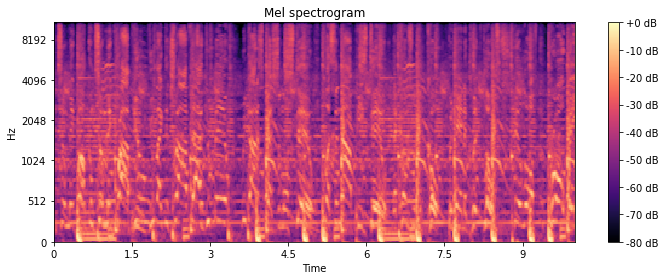

In [ ]:
#Visualisasi Mel-spectogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [ ]:
#Contoh musik genre Pop
y, sr = librosa.load(r'drive/MyDrive/fma_small/0/000010.mp3', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

(128, 431)

In [ ]:
#Mel-frequency spectogram
ps

array([[2.1377711e-01, 1.8673147e-01, 3.6628008e-02, ..., 4.4806908e+01,
        1.2311261e+01, 3.0582023e+00],
       [3.5837796e-01, 2.0064412e-01, 8.8016964e-02, ..., 2.4256569e+02,
        3.4682556e+01, 7.3959455e+00],
       [2.2368007e+00, 6.0915499e+00, 9.2916918e+00, ..., 4.3831398e+01,
        2.8953013e+00, 9.7724956e-01],
       ...,
       [3.5368562e-02, 7.0275709e-02, 5.8645256e-02, ..., 8.2669323e-03,
        5.2801301e-03, 2.6197291e-03],
       [5.9892908e-03, 1.8874800e-02, 1.7571406e-02, ..., 2.4722421e-03,
        1.3109734e-03, 8.6449168e-04],
       [3.4103083e-04, 1.0091229e-03, 1.2462259e-03, ..., 1.3374664e-04,
        1.1967302e-04, 1.2815844e-04]], dtype=float32)

In [ ]:
#Membuat audio object 10 detik
IPython.display.Audio(data=y, rate=sr)

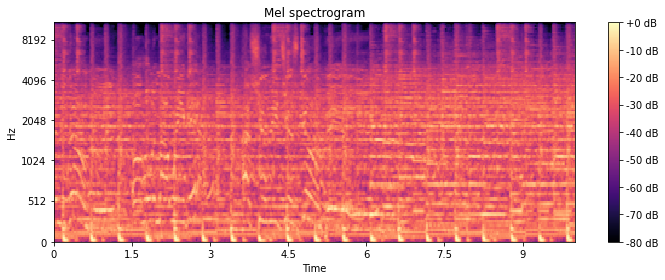

In [ ]:
#Visualisasi Mel-spectogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [ ]:
#Contoh musik genre Rock
y, sr = librosa.load(r'drive/MyDrive/fma_small/0/000255.mp3', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

(128, 431)

In [ ]:
#Mel-frequency spectogram
ps

array([[2.1346213e-02, 7.3547445e-02, 8.4649608e-02, ..., 2.9032352e+00,
        2.4077034e+00, 1.0950277e+00],
       [5.8657102e-02, 1.2909965e-01, 8.5941613e-02, ..., 8.0354471e+00,
        1.1722165e+01, 1.3460706e+01],
       [1.1255319e-01, 2.9288572e-01, 5.9709632e-01, ..., 2.1750956e+01,
        1.3227350e+01, 9.5804024e+00],
       ...,
       [1.8850506e-06, 1.0348643e-05, 1.2867456e-05, ..., 4.6277792e-06,
        5.0909998e-06, 9.6875796e-05],
       [2.2651511e-07, 2.5805562e-06, 4.0977120e-06, ..., 2.1432575e-06,
        1.9444710e-06, 4.7705656e-05],
       [2.1307908e-08, 1.8956430e-07, 3.7066394e-07, ..., 9.1019402e-08,
        1.4151857e-07, 4.6443092e-06]], dtype=float32)

In [ ]:
#Membuat audio object 10 detik
IPython.display.Audio(data=y, rate=sr)

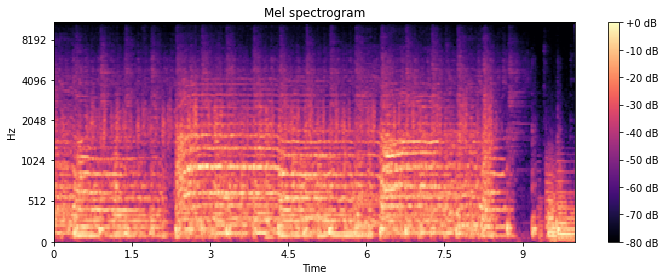

In [ ]:
#Visualisasi Mel-spectogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

# Data Augmentasi

In [ ]:
#Data Augmentation (time stretch rate = 0.8)
import soundfile as sf
from pydub import AudioSegment
from google.colab import drive
drive.mount('/content/drive')
rate = 0.8

for row in data.itertuples():
    y, sr = librosa.load('drive/MyDrive/fma_small/' + row.path)
    y_changed = librosa.effects.time_stretch(y, rate=rate)
    sound = AudioSegment.from_mp3('drive/MyDrive/fma_small/'+row.path)
    sf.write(sound.export('drive/MyDrive/fma_small_augmented/' + row.path + '.wav', format= "wav"), y_changed, sr)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Data Augmentation (time stretch rate = 0.9)
from google.colab import drive
drive.mount('/content/drive')
rate = 0.9

for row in data.itertuples():
    y, sr = librosa.load('drive/MyDrive/fma_small/' + row.path)
    y_changed = librosa.effects.time_stretch(y, rate=rate)
    sound = AudioSegment.from_mp3('drive/MyDrive/fma_small/'+row.path)
    sf.write(sound.export('drive/MyDrive/fma_small_augmented2/' + row.path + '.wav', format= "wav"), y_changed, sr)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Data Augmentation (pitch shift n_steps = 2)
n_steps = 2

for row in data.itertuples():
    y, sr = librosa.load('drive/MyDrive/fma_small/' + row.path)
    y_changed = librosa.effects.pitch_shift(y, sr, n_steps=n_steps)
    sound = AudioSegment.from_mp3('drive/MyDrive/fma_small/'+row.path)
    sf.write(sound.export('drive/MyDrive/fma_small_augmented1/' + row.path + '.wav', format= "wav"), y_changed, sr)

In [ ]:
#Data Augmentation (pitch shift n_steps = -2)
n_steps = -2

for row in data.itertuples():
    y, sr = librosa.load('drive/MyDrive/fma_small/' + row.path)
    y_changed = librosa.effects.pitch_shift(y, sr, n_steps=n_steps)
    sound = AudioSegment.from_mp3('drive/MyDrive/fma_small/'+row.path)
    sf.write(sound.export('drive/MyDrive/fma_small_augmented3/' + row.path + '.wav', format= "wav"), y_changed, sr)

# Perbandingan Hasil Augmentasi

In [ ]:
#Contoh musik genre Rock (original file)
y, sr = librosa.load(r'drive/MyDrive/fma_small/0/000002.mp3', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

(128, 431)

In [ ]:
 IPython.display.Audio(data=y, rate=sr)

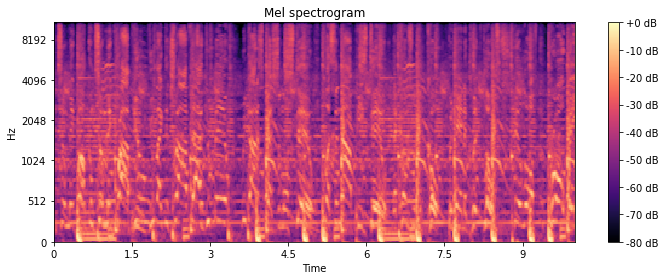

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [ ]:
#Contoh musik genre Rock (time stretch rate = 0.8)
from google.colab import drive
drive.mount('/content/drive')
y, sr = librosa.load(r'drive/MyDrive/fma_small_augmented/0/000002.mp3.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(128, 431)

In [ ]:
IPython.display.Audio(data=y, rate=sr)

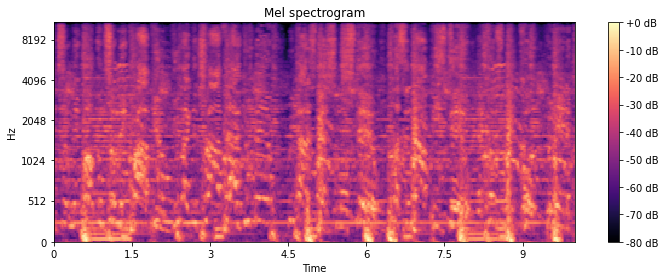

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [ ]:
#Contoh musik genre Rock (pitch shift n_steps = 2)
from google.colab import drive
drive.mount('/content/drive')
y, sr = librosa.load(r'drive/MyDrive/fma_small_augmented1/0/000002.mp3.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(128, 431)

In [ ]:
IPython.display.Audio(data=y, rate=sr)

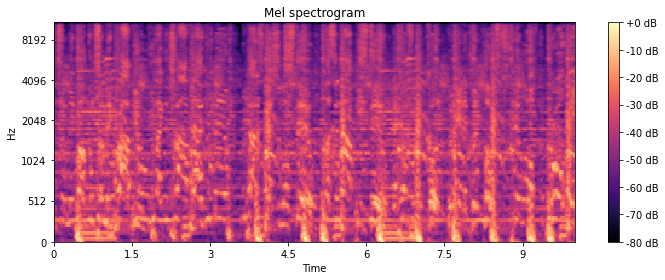

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

# Dataset append

In [ ]:
#Dataset 1
from google.colab import drive
drive.mount('/content/drive')
D1 = []

for row in data.itertuples():
    y, sr = librosa.load(r'drive/MyDrive/fma_small/' + row.path, duration=10)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    if ps.shape != (128, 431): continue
    D1.append( (ps, row.genre_number) )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Dataset 2 (time stretch 0.8)
from google.colab import drive
drive.mount('/content/drive')
D2 = []

for row in data.itertuples():
    y, sr = librosa.load(r'drive/MyDrive/fma_small_augmented/' + row.path + '.wav', duration=10)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    if ps.shape != (128, 431): continue
    D2.append( (ps, row.genre_number) )


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Dataset 3 (pitch shift 2)
D3 = []

for row in data.itertuples():
    y, sr = librosa.load(r'drive/MyDrive/fma_small_augmented1/' + row.path + '.wav', duration=10)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    if ps.shape != (128, 431): continue
    D3.append( (ps, row.genre_number) )

In [ ]:
#Dataset 4 (time stretch 0.9)
D4 = []

for row in data.itertuples():
    y, sr = librosa.load(r'drive/MyDrive/fma_small_augmented2/' + row.path + '.wav', duration=10)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    if ps.shape != (128, 431): continue
    D4.append( (ps, row.genre_number) )

In [ ]:
#Dataset 5 (pitch shift -2)
D5 = []

for row in data.itertuples():
    y, sr = librosa.load(r'drive/MyDrive/fma_small_augmented3/' + row.path + '.wav', duration=10)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    if ps.shape != (128, 431): continue
    D5.append( (ps, row.genre_number) )


In [ ]:
D = D1 + D2 + D3 + D4 + D5

In [ ]:
print("Nu|mber of samples: ", len(D))

Nu|mber of samples:  125


# CNN Model

In [ ]:
dataset = D
random.shuffle(dataset)

#train dev test split 8:1:1
train = dataset[:100]
dev = dataset[100:113]
test = dataset[113:]

X_train, Y_train = zip(*train)
X_dev, Y_dev = zip(*dev)
X_test, Y_test = zip(*test)

#Reshape for CNN input
X_train = np.array([x.reshape( (128, 431, 1) ) for x in X_train])
X_dev = np.array([x.reshape((128, 431, 1)) for x in X_dev])
X_test = np.array([x.reshape( (128, 431, 1) ) for x in X_test])

Y_train = np.array(keras.utils.np_utils.to_categorical(Y_train, 8))
Y_dev = np.array(keras.utils.np_utils.to_categorical(Y_dev, 8))
Y_test = np.array(keras.utils.np_utils.to_categorical(Y_test, 8))

In [ ]:
model = Sequential()
input_shape=(128, 431, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(8))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 124, 427, 24)      624       
                                                                 
 average_pooling2d_9 (Averag  (None, 62, 213, 24)      0         
 ePooling2D)                                                     
                                                                 
 activation_15 (Activation)  (None, 62, 213, 24)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 62, 213, 48)       28848     
                                                                 
 average_pooling2d_10 (Avera  (None, 31, 106, 48)      0         
 gePooling2D)                                                    
                                                                 
 activation_16 (Activation)  (None, 31, 106, 48)      

In [ ]:
epochs = 60
batch_size = 5
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.9
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=['accuracy'])

Epoch 1/60
20/20 [==============================] - 15s 718ms/step - loss: 2.9270 - accuracy: 0.3600 - val_loss: 1.9823 - val_accuracy: 0.4615
Epoch 2/60
20/20 [==============================] - 13s 664ms/step - loss: 1.6662 - accuracy: 0.5700 - val_loss: 1.6044 - val_accuracy: 0.5385
Epoch 3/60
20/20 [==============================] - 13s 665ms/step - loss: 1.1657 - accuracy: 0.6500 - val_loss: 1.6090 - val_accuracy: 0.6154
Epoch 4/60
20/20 [==============================] - 13s 668ms/step - loss: 1.3974 - accuracy: 0.6000 - val_loss: 1.5640 - val_accuracy: 0.4615
Epoch 5/60
20/20 [==============================] - 13s 665ms/step - loss: 0.9638 - accuracy: 0.7100 - val_loss: 1.4218 - val_accuracy: 0.4615
Epoch 6/60
20/20 [==============================] - 15s 780ms/step - loss: 0.9469 - accuracy: 0.6600 - val_loss: 0.9787 - val_accuracy: 0.6154
Epoch 7/60
20/20 [==============================] - 16s 790ms/step - loss: 0.6759 - accuracy: 0.7600 - val_loss: 0.9668 - val_accuracy: 0.6154

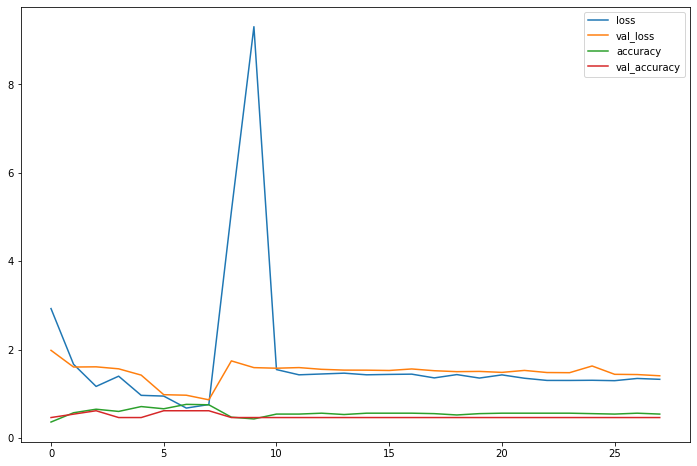

1/1 [==============================] - 0s 415ms/step - loss: 0.9791 - accuracy: 0.6667
Test loss: 0.9790613651275635
Test accuracy: 0.6666666865348816


In [ ]:
with K.tf.device('/gpu:0'):
    tb_hist = keras.callbacks.TensorBoard(log_dir='drive/MyDrive/.keras/graph', histogram_freq=0, write_graph=True, write_images=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=2)
    hist = model.fit(x=X_train, y=Y_train, epochs=epochs, batch_size=batch_size, validation_data= (X_dev, Y_dev), callbacks=[early_stopping, tb_hist])

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.show()

score = model.evaluate(x=X_test, y=Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
epochs = 20
batch_size = 10
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

Epoch 1/20
10/10 [==============================] - 14s 1s/step - loss: 1.2306 - accuracy: 0.5600 - val_loss: 1.3855 - val_accuracy: 0.4615
Epoch 2/20
10/10 [==============================] - 13s 1s/step - loss: 1.2019 - accuracy: 0.5700 - val_loss: 1.3418 - val_accuracy: 0.4615
Epoch 3/20
10/10 [==============================] - 13s 1s/step - loss: 1.2173 - accuracy: 0.5600 - val_loss: 1.2971 - val_accuracy: 0.4615
Epoch 4/20
10/10 [==============================] - 13s 1s/step - loss: 0.9873 - accuracy: 0.6800 - val_loss: 1.4477 - val_accuracy: 0.4615
Epoch 5/20
10/10 [==============================] - 13s 1s/step - loss: 0.7351 - accuracy: 0.7300 - val_loss: 1.2298 - val_accuracy: 0.4615
Epoch 6/20
10/10 [==============================] - 13s 1s/step - loss: 0.6495 - accuracy: 0.7600 - val_loss: 1.3727 - val_accuracy: 0.6154
Epoch 7/20
10/10 [==============================] - 13s 1s/step - loss: 0.5955 - accuracy: 0.8100 - val_loss: 0.9648 - val_accuracy: 0.5385
Epoch 8/20
10/10 [==

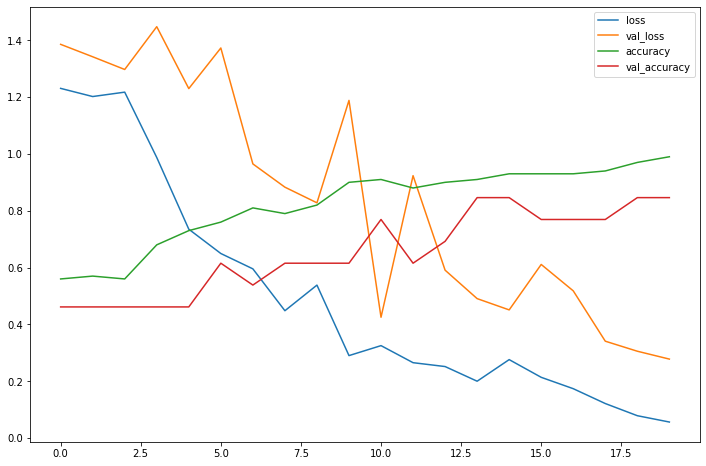

1/1 [==============================] - 0s 396ms/step - loss: 0.0175 - accuracy: 1.0000
Test loss: 0.017466731369495392
Test accuracy: 1.0


In [ ]:
with K.tf.device('/gpu:0'):
    tb_hist = keras.callbacks.TensorBoard(log_dir='drive/MyDrive/.keras/graph', histogram_freq=0, write_graph=True, write_images=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=2)
    hist = model.fit(x=X_train, y=Y_train, epochs=epochs, batch_size=batch_size, validation_data= (X_dev, Y_dev), callbacks=[early_stopping, tb_hist])

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.show()

score = model.evaluate(x=X_test, y=Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tb_callback = tf.keras.callbacks.TensorBoard('drive/MyDrive/.keras/graph', update_freq=1)

In [ ]:
model.save('music_genre_classification.h5')

# Prediksi Model

In [ ]:
model = load_model('music_genre_classification.h5')

In [ ]:
#Input file dataset yang akan digunakan (format .csv)
from google.colab import files
data_to_load = files.upload()

In [ ]:
#Klasifikasi genre musik
def genre_number(i):
    if i == 'Hip-Hop':
        return 0
    elif i == 'Pop':
        return 1
    elif i == 'Folk':
        return 2
    elif i == 'Rock':
        return 3
    elif i == 'Experimental':
        return 4
    elif i == 'International':
        return 5
    elif i == 'Electronic':
        return 6
    else:
        return '7'

data['genre_number'] = data['genre'].apply(genre_number)
data['file_name'] = data['file_name'].apply(lambda x: '{0:0>6}'.format(x))
data['path'] = data['file_name'].astype('str') + ".mp3"
data['path'].head(5)

In [ ]:
#Test Dataset
D = []
for row in data.itertuples():
    y, sr = librosa.load(r'drive/MyDrive/fma_small/0/' + row.path, duration=10)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    if ps.shape != (128, 431): continue
    D.append( (ps, row.genre_number) )

In [ ]:
print("Number of samples: ", len(D))

In [ ]:
test = D
X_test, Y_test = zip(*test)
X_test = np.array([x.reshape( (128, 431, 1) ) for x in X_test])
Y_test = np.array(keras.utils.np_utils.to_categorical(Y_test, 8))

In [ ]:
#Print hasil prediksi klasifikasi genre musik
yhat = (model.predict(X_test) > 0.5).astype("int32")
for i in range(len(D)):
    print('file_name: ' + data['file_name'][i] + ' True: ' + str(argmax(Y_test[i])) + ', Predict: ' + str(yhat[i]))